In [1]:
%matplotlib inline
import molsysmt as msm
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#from molsysmt.tools.nglview import adding_molsysmt
#adding_molsysmt()

## Preprocess the molecular system

In [2]:
molecular_system = msm.convert('1NCR', 'molsysmt.MolSys')
molecular_system = msm.remove_solvent(molecular_system, water=True, ions=True)
molecular_system = msm.add_missing_hydrogens(molecular_system, pH=7.4)
msm.info(molecular_system)

/Users/danielibarrola/Documents/molsys/MolSys_v0.1/MolSysMT/molsysmt/native/io/topology/classes/mmtf_MMTFDecoder.py:43: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_small_molecules,n_peptides,n_proteins,n_frames
molsysmt.MolSys,12538,806,6,6,6,6,2,2,2,1


In [3]:
msm.info(molecular_system, target='component')

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,4489,285,0,0,protein,0,Protein_0
1,7571,490,1,1,protein,1,Protein_1
2,104,7,3,2,peptide,2,Peptide_0
3,332,22,3,3,peptide,3,Peptide_1
4,27,1,4,4,small molecule,4,W11
5,15,1,5,5,small molecule,5,MYR


In [4]:
msm.view(molecular_system, selection='entity_name=="W11"')

NotImplementedError: It has not been implemeted yet. Write a new issue in https://github.com/uibcdf/MolSysMT/issues asking for it.

## Make an Networkx graph for the small molecule

The graph is still incomplete and contains errors

In [9]:
graph = msm.bondgraph(molecular_system, nodes_name="atom_index", selection='molecule_index==4', to_form="networkx.Graph")
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges()
print('The graph has {} nodes and {} edges'.format(n_nodes, n_edges))
n_atoms, n_bonds = msm.get(molecular_system, selection='molecule_index==3', n_atoms=True,
                           n_inner_bonds=True)
print('The molecule has {} atoms and {} bonds'.format(n_atoms, n_bonds))

The graph has 27 nodes and 29 edges
The molecule has 332 atoms and 335 bonds


In [10]:
type(graph)

networkx.classes.multigraph.MultiGraph

In [11]:
graph.edges(data=True)

MultiEdgeDataView([(12496, 12497, {}), (12496, 12501, {}), (12497, 12498, {}), (12498, 12499, {}), (12498, 12500, {}), (12500, 12501, {}), (12501, 12502, {}), (12502, 12503, {}), (12503, 12504, {}), (12504, 12505, {}), (12505, 12506, {}), (12506, 12507, {}), (12506, 12512, {}), (12507, 12508, {}), (12507, 12509, {}), (12509, 12510, {}), (12510, 12511, {}), (12510, 12514, {}), (12511, 12512, {}), (12512, 12513, {}), (12514, 12515, {}), (12514, 12516, {}), (12515, 12519, {}), (12516, 12517, {}), (12517, 12518, {}), (12517, 12519, {}), (12518, 12520, {}), (12518, 12521, {}), (12518, 12522, {})])

In [12]:
graph.nodes(data=True)

NodeDataView({12496: {}, 12497: {}, 12498: {}, 12499: {}, 12500: {}, 12501: {}, 12502: {}, 12503: {}, 12504: {}, 12505: {}, 12506: {}, 12507: {}, 12508: {}, 12509: {}, 12510: {}, 12511: {}, 12512: {}, 12513: {}, 12514: {}, 12515: {}, 12516: {}, 12517: {}, 12518: {}, 12519: {}, 12520: {}, 12521: {}, 12522: {}})

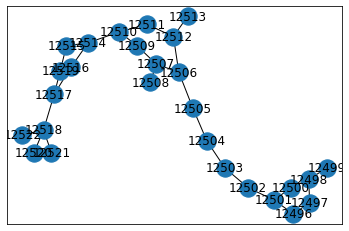

In [13]:
nx.draw_networkx(graph)

In [14]:
graph.is_multigraph()

True

The graph should be a multigraph. It could also contain more information for each atom

## Getting Hydrogen Bond Donors and Acceptors

In [15]:
donors = msm.hbonds.get_donor_atoms(molecular_system, selection="molecule_index==4")
print(f"{len(donors)} donor atoms")

0 donor atoms


In [16]:
acceptors = msm.hbonds.get_acceptor_atoms(molecular_system, selection="molecule_index==4")
print(f"{len(acceptors)} acceptor atoms")
acceptors

6 acceptor atoms


array([12496, 12497, 12505, 12515, 12516, 12519])

In [17]:
a_atoms, a_coordinates = msm.get(molecular_system, 
                                     selection="molecule_index==3", 
                                     indices=acceptors, 
                                     target="atom", 
                                     name=True, 
                                     coordinates=True, 
                                     )

In [18]:
for i in range(len(a_atoms)):
    print(f"Atom: {a_atoms[i]} with coordinates {a_coordinates[0][i]}\n")

Atom: O1 with coordinates [3.8877999782562256 0.39070001244544983 12.446700096130371] nanometer

Atom: N2 with coordinates [3.7702999114990234 0.4765999913215637 12.483400344848633] nanometer

Atom: O1B with coordinates [4.26800012588501 0.1753000020980835 12.344499588012695] nanometer

Atom: N1A with coordinates [4.579800128936768 -0.36500000953674316 12.09939956665039] nanometer

Atom: N3A with coordinates [4.745100021362305 -0.26829999685287476 12.238300323486328] nanometer

Atom: O1A with coordinates [4.70959997177124 -0.4510999917984009 12.084699630737305] nanometer



## Further exploration of the molecule

In [19]:
#bond_type doesn't work

msm.get(molecular_system, 
        selection="molecule_index==4", 
        target="atom",
        name=True,
        index=True,
        bonded_atoms=True,
        )

[array(['O1', 'N2', 'C3', ..., 'F1', 'F2', 'F3'], dtype=object),
 array([12496, 12497, 12498, ..., 12520, 12521, 12522]),
 array([array([12497, 12501]), array([12496, 12498]),
        array([12497, 12499, 12500]), ..., array([12518]), array([12518]),
        array([12518])], dtype=object)]

## Exploring another system

In [20]:
molecular_system = msm.convert('2E1W', to_form='molsysmt.MolSys')
molecular_system = msm.remove_solvent(molecular_system, water=True, ions=True)
molecular_system = msm.add_missing_hydrogens(molecular_system, pH=7.4)
msm.info(molecular_system, target='component')

/Users/danielibarrola/Documents/molsys/MolSys_v0.1/MolSysMT/molsysmt/native/io/topology/classes/mmtf_MMTFDecoder.py:43: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


NotImplementedError: The mmtf entity type {'description': '1-{(1R,2S)-2-HYDROXY-1-[2-(1-NAPHTHYL)ETHYL]PROPYL}-1H-IMIDAZOLE-4-CARBOXAMIDE', 'type': 'non-polymer', 'chainIndexList': [2], 'sequence': ''} is not implemented.

In [23]:
#Number of hydrogens
len(msm.get(molecular_system, selection='atom_type=="H"', index=True))

2746

In [12]:
FR6_molecule = msm.convert('2E1W', to_form='molsysmt.MolSys', selection='molecule_type=="protein"')

NotImplementedError: The mmtf entity type {'description': 'ZINC ION', 'type': 'non-polymer', 'chainIndexList': [1], 'sequence': ''} is not implemented.

In [32]:
msm.view(molecular_system, selection='entity_name=="FR6"')

NGLWidget()

In [19]:
msm.get(molecular_system, selection='entity_name=="FR6"', atom_name=True)

array(['C1', 'N2', 'C3', 'N4', 'C5', 'C8', 'O9', 'N10', 'C13', 'C14',
       'O15', 'C18', 'C19', 'C22', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C2', 'C4', 'C6', 'C7', 'C9'], dtype=object)

In [15]:
donors = msm.hbonds.get_donor_atoms(molecular_system, selection="molecule_index==1")
print(f"{len(donors)} donor atoms")
acceptors = msm.hbonds.get_acceptor_atoms(molecular_system, selection="molecule_index==1")
print(f"{len(acceptors)} acceptor atoms")
acceptors

0 donor atoms
5 acceptor atoms


array([5536, 5538, 5541, 5542, 5545])

## Yet another system

In [21]:
mol_system_2 = msm.convert("1TCD", "molsysmt.MolSys")
mol_system_2 = msm.remove_solvent(mol_system_2, water=True, ions=True)
mol_system_2 = msm.add_missing_hydrogens(mol_system_2, pH=7.4)
msm.info(mol_system_2, target="component")

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,3848,248,0,0,protein,0,Protein_0
1,3859,249,1,1,protein,1,Protein_1


In [22]:
msm.view(mol_system_2)

IndexError: list index out of range

In [23]:
graph = msm.bondgraph(mol_system_2, nodes_name="atom_index", selection='molecule_index==0', to_form="networkx.Graph")
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges()
print('The graph has {} nodes and {} edges'.format(n_nodes, n_edges))
n_atoms, n_bonds = msm.get(mol_system_2, selection='molecule_index==0', n_atoms=True,
                           n_inner_bonds=True)
print('The molecule has {} atoms and {} bonds'.format(n_atoms, n_bonds))

The graph has 3848 nodes and 3884 edges
The molecule has 3848 atoms and 3884 bonds


In [24]:
graph.is_multigraph()

True

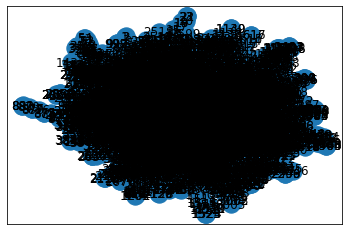

In [9]:
# graph.edges(data=True)
nx.draw_networkx(graph)

[1.8466999530792236 2.7637999057769775 8.366100311279297] nanometer
[1.7809898853302002 2.6638009548187256 8.357183456420898] nanometer
[0.06571006774902344 0.09999895095825195 0.008916854858398438] nanometer
0.11998797230096804 nanometer
0.11998797230096804


/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:17: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.


### Other systems to try
Currently this are not working

In [ ]:
# Can't load this PDB entry
molecular_system_2 = msm.convert('1BMK', 'molsysmt.MolSys')
molecular_system_2 = msm.remove_solvent(molecular_system_2, water=True, ions=True)
molecular_system_2 = msm.add_missing_hydrogens(molecular_system_2, pH=7.4)
msm.info(molecular_system_2, target='component')

In [ ]:
# Can't load this PDB entry
molecular_system_2 = msm.convert('2FDA', 'molsysmt.MolSys')
molecular_system_2 = msm.remove_solvent(molecular_system_2, water=True, ions=True)
molecular_system_2 = msm.add_missing_hydrogens(molecular_system_2, pH=7.4)
msm.info(molecular_system_2, target='component')

In [ ]:
# Can't load this PDB entry
molecular_system_2 = msm.convert('3K5U', 'molsysmt.MolSys')
molecular_system_2 = msm.remove_solvent(molecular_system_2, water=True, ions=True)
molecular_system_2 = msm.add_missing_hydrogens(molecular_system_2, pH=7.4)
msm.info(molecular_system_2, target='component')